# Drug Persistency on Healthcare_datasets

In [2]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_curve, auc,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [6]:
df=pd.read_csv('num_data.csv')

In [34]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,0,1,1,2.0,1.0,3.0,3,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,0,1,1.0,1.0,3.0,0,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2222,0,0,2.0,0.0,0.0,1,5.0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,2758,0,0,2.0,1.0,0.0,3,5.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2869,0,0,2.0,1.0,0.0,3,5.0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Splitting the data into fetaures and target ( persistency_flag ).

In [35]:
x = df.copy()
y = x[['Persistency_Flag']]
x = x.drop(['Ptid','Persistency_Flag','Ntm_Specialist_Flag'],axis=1)

## Selecting the best 20 features using f_classif classifier

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif,k= 50)
x_selected = fs.fit_transform(x, y.values.ravel())


In [37]:
print(x_selected.shape)

(3424, 50)


In [38]:
pd.set_option('display.max_rows', None)

In [39]:
feature_columns=x.columns
feature_list = []
for i in range(len(fs.scores_)):
    feature_list.append([feature_columns[i],fs.scores_[i]])
feature_df = pd.DataFrame(feature_list)
feature_df = feature_df.sort_values(1,ascending=False)
feature_df.columns = ['fetaure','score']
feature_df

,fetaure,score
9,Dexa_During_Rx,1091.855429
8,Dexa_Freq_During_Rx,615.883189
23,Comorb_Long_Term_Current_Drug_Therapy,486.352971
17,Comorb_Encounter_For_Screening_For_Malignant_N...,396.729142
18,Comorb_Encounter_For_Immunization,376.650551
19,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_...",313.809201
26,Comorb_Other_Disorders_Of_Bone_Density_And_Str...,222.880101
33,Concom_Systemic_Corticosteroids_Plain,214.471942
21,Comorb_Other_Joint_Disorder_Not_Elsewhere_Clas...,196.939283
39,Concom_Anaesthetics_General,177.885055


In [40]:
selected_columns = feature_df['fetaure'][:50].tolist()
selected_columns

['Dexa_During_Rx',
 'Dexa_Freq_During_Rx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Concom_Systemic_Corticosteroids_Plain',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Concom_Anaesthetics_General',
 'Concom_Viral_Vaccines',
 'Concom_Macrolides_And_Similar_Types',
 'Concom_Cephalosporins',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Dorsalgia',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Gluco_Record_During_Rx',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Narcotics',
 'Concom_Fluoroquinolones',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_

In [42]:
# Filtering the selected columns

x = features[selected_columns]

In [44]:
y['Persistency_Flag'].value_counts()

0    2135
1    1289
Name: Persistency_Flag, dtype: int64

### The data set is imbalanced and we need to balance it using smote

In [46]:
oversample = SMOTE()
xf,yf = oversample.fit_resample(x, y)

In [47]:
yf['Persistency_Flag'].value_counts()

0    2135
1    2135
Name: Persistency_Flag, dtype: int64

### Now the class is balance

## Splitting the dataset into testing and training

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2568, 50) (2568, 1)
Test set: (856, 50) (856, 1)


In [53]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

C:\Users\afshan.hashmi.TOP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=100.0, solver='liblinear')


In [54]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 1

In [55]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8271028037383178


In [56]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       533
           1       0.79      0.74      0.76       323

    accuracy                           0.83       856
   macro avg       0.82      0.81      0.81       856
weighted avg       0.83      0.83      0.83       856



In [58]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7887788778877888
Overall Recall: 0.739938080495356


In [59]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.91268999 0.08731001]
 [0.92045149 0.07954851]
 [0.33793373 0.66206627]
 ...
 [0.87992112 0.12007888]
 [0.70264367 0.29735633]
 [0.80163122 0.19836878]]


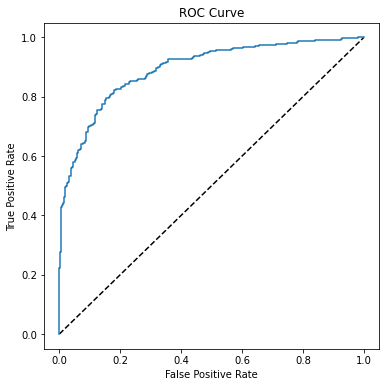

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8939701090271202


## saving the model in a pickle file

In [63]:
import joblib

# Save the model as a pickle file
filename = './LRdrug_model.pkl'# logistic regression
joblib.dump(model, filename)

['./LRdrug_model.pkl']